In [82]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [83]:
import seaborn as sns #for visualization
import matplotlib.pyplot as plt #for visualization
#from jupyterthemes import jtplot #for styling matplotlib
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [84]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

In [85]:
#jtplot.style(theme = 'monokai', context = 'notebook', grid = False, ticks = False)

In [86]:
train_data

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation
...,...,...,...
31957,31958,0,ate @user isz that youuu?ðððððð...
31958,31959,0,to see nina turner on the airwaves trying to...
31959,31960,0,listening to sad songs on a monday morning otw...
31960,31961,1,"@user #sikh #temple vandalised in in #calgary,..."


0 label = Positive Tweet

1 label = Negative Tweet

In [87]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      31962 non-null  int64 
 1   label   31962 non-null  int64 
 2   tweet   31962 non-null  object
dtypes: int64(2), object(1)
memory usage: 749.2+ KB


In [88]:
train_data.shape

(31962, 3)

In [89]:
train_data['tweet']

0         @user when a father is dysfunctional and is s...
1        @user @user thanks for #lyft credit i can't us...
2                                      bihday your majesty
3        #model   i love u take with u all the time in ...
4                   factsguide: society now    #motivation
                               ...                        
31957    ate @user isz that youuu?ðððððð...
31958      to see nina turner on the airwaves trying to...
31959    listening to sad songs on a monday morning otw...
31960    @user #sikh #temple vandalised in in #calgary,...
31961                     thank you @user for you follow  
Name: tweet, Length: 31962, dtype: object

In [90]:
train_data = train_data.drop('id', axis = 1)

In [91]:
train_data.head()

,label,tweet
0,0,@user when a father is dysfunctional and is s...
1,0,@user @user thanks for #lyft credit i can't us...
2,0,bihday your majesty
3,0,#model i love u take with u all the time in ...
4,0,factsguide: society now #motivation


Exploring the dataset

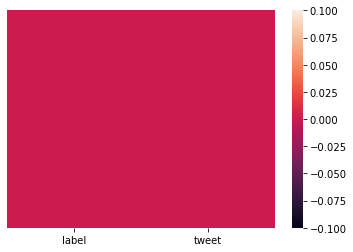

In [92]:
sns.heatmap(train_data.isnull(), yticklabels = False)
plt.show()

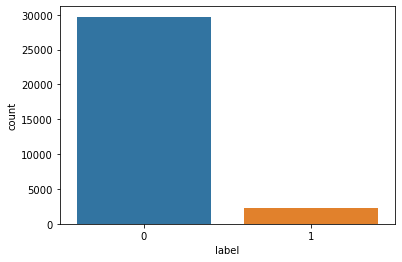

In [93]:
sns.countplot(x = train_data['label'])
plt.show()

In [94]:
len(train_data)

31962

In [95]:
length = list()
for i in range(len(train_data)):
    length.append(len(train_data.iloc[i,1]))

In [96]:
train_data['length'] = length

In [97]:
train_data.head()

,label,tweet,length
0,0,@user when a father is dysfunctional and is s...,102
1,0,@user @user thanks for #lyft credit i can't us...,122
2,0,bihday your majesty,21
3,0,#model i love u take with u all the time in ...,86
4,0,factsguide: society now #motivation,39


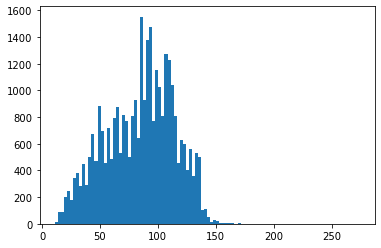

In [98]:
plt.hist(train_data['length'], bins = 100)
plt.show()

In [99]:
train_data.describe()

,label,length
count,31962.000000,31962.000000
mean,0.070146,84.739628
std,0.255397,29.455749
min,0.000000,11.000000
25%,0.000000,63.000000
50%,0.000000,88.000000
75%,0.000000,108.000000
max,1.000000,274.000000


Shortest Tweet -

In [100]:
train_data[train_data['length'] == min(train_data['length'])]['tweet'].iloc[0]

'i love you '

Longest Tweet - 

In [101]:
train_data[train_data['length'] == max(train_data['length'])]['tweet'].iloc[0]

' @user lmfao pathetic #soit   #growup #funny #noonethere #iknowwhoitis ð\x9f\x98\x82ð\x9f\x98\x82ð\x9f\x98\x82ð\x9f\x98\x82ð\x9f\x98\x82ð\x9f\x98\x82ð\x9f\x98\x82ð\x9f\x98\x82ð\x9f\x98\x82ð\x9f\x98\x82ð\x9f\x98\x82ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f\x98±ð\x9f\x98±ð\x9f¤\x97ð\x9f¤\x97ð\x9f\x98±ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f\x98\x82ð\x9f\x98\x82ð\x9f\x98\x82ð\x9f\x98\x82ð\x9f\x98\x82ð\x9f\x98\x82ð\x9f\x98\x82â\x80¦'

Average Length Tweet - 

In [102]:
train_data[train_data['length'] == 86]['tweet'].iloc[0]

'#model   i love u take with u all the time in urð\x9f\x93±!!! ð\x9f\x98\x99ð\x9f\x98\x8eð\x9f\x91\x84ð\x9f\x91\x85ð\x9f\x92¦ð\x9f\x92¦ð\x9f\x92¦  '

In [103]:
positive = train_data[train_data['label'] == 0]

In [104]:
positive.describe()

,label,length
count,29720.0,29720.000000
mean,0.0,84.328634
std,0.0,29.566484
min,0.0,11.000000
25%,0.0,62.000000
50%,0.0,88.000000
75%,0.0,107.000000
max,0.0,274.000000


In [105]:
negative = train_data[train_data['label'] == 1]

In [106]:
negative

,label,tweet,length
13,1,@user #cnn calls #michigan middle school 'buil...,74
14,1,no comment! in #australia #opkillingbay #se...,101
17,1,retweet if you agree!,22
23,1,@user @user lumpy says i am a . prove it lumpy.,47
34,1,it's unbelievable that in the 21st century we'...,104
...,...,...,...
31934,1,lady banned from kentucky mall. @user #jcpenn...,59
31946,1,@user omfg i'm offended! i'm a mailbox and i'...,82
31947,1,@user @user you don't have the balls to hashta...,112
31948,1,"makes you ask yourself, who am i? then am i a...",87


In [107]:
negative.describe()

,label,length
count,2242.0,2242.000000
mean,1.0,90.187779
std,0.0,27.375502
min,1.0,12.000000
25%,1.0,69.000000
50%,1.0,96.000000
75%,1.0,111.000000
max,1.0,152.000000


In [108]:
import sys
print(sys.executable)

C:\Users\EL KHADRI\Anaconda3\python.exe


In [109]:
pip install some_package

Note: you may need to restart the kernel to use updated packages.


In [110]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [111]:
from wordcloud import WordCloud

In [112]:
sentences = train_data['tweet'].tolist()

In [113]:
#conda install -c conda-forge wordcloud=1.8.1


In [114]:
combined_sentences = " ".join(sentences)

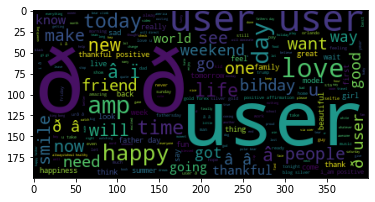

In [115]:
plt.imshow(WordCloud().generate(combined_sentences))
plt.show()

In [116]:
negative_sentences = negative['tweet'].tolist()

In [117]:
combined_negative_sentences = " ".join(negative_sentences)

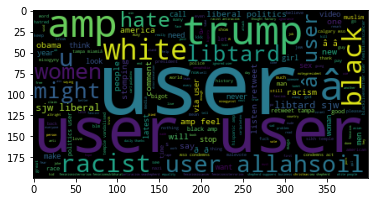

In [118]:
plt.imshow(WordCloud().generate(combined_negative_sentences))
plt.show()

Cleaning the data

In [119]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [120]:
import nltk

In [121]:
import nltk
nltk.download('stopwords')

InvalidURL: URL can't contain control characters. 'SYSTEM PROXY' (found at least ' ')

In [122]:
nltk.download('stopwords')

InvalidURL: URL can't contain control characters. 'SYSTEM PROXY' (found at least ' ')

In [71]:
from nltk.corpus import stopwords

In [64]:
st = stopwords.words('english')
st.append("and")

LookupError: 
**********************************************************************
  Resource [93mstopwords[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('stopwords')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mcorpora/stopwords[0m

  Searched in:
    - 'C:\\Users\\EL KHADRI/nltk_data'
    - 'C:\\Users\\EL KHADRI\\Anaconda3\\nltk_data'
    - 'C:\\Users\\EL KHADRI\\Anaconda3\\share\\nltk_data'
    - 'C:\\Users\\EL KHADRI\\Anaconda3\\lib\\nltk_data'
    - 'C:\\Users\\EL KHADRI\\AppData\\Roaming\\nltk_data'
    - 'C:\\nltk_data'
    - 'D:\\nltk_data'
    - 'E:\\nltk_data'
**********************************************************************


In [56]:
import nltk

nltk.set_proxy('http://proxy.example.com:3128', ('USERNAME', 'PASSWORD'))
nltk.download('stopwords')

[nltk_data] Error loading stopwords: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


False

In [ ]:
Test = "Goblin and Ninja FoR the win!!"
test_punc_removed = []
for char in Test:
    if char not in string.punctuation:
        test_punc_removed.append(char)
test_punc_removed = ''.join(test_punc_removed)        

In [ ]:
test_punc_removed

In [ ]:
test_punc_st_removed = []
for char in test_punc_removed.split():
    if char.lower() not in st:
        test_punc_st_removed.append(char)
test_punc_st_removed = " ".join(test_punc_st_removed)  

In [ ]:
test_punc_st_removed

Tokenization

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
sample_data = ["This is my first paper", "This is the second document", "here is the third thi one"]

In [ ]:
vectorizer = CountVectorizer()

In [ ]:
X = vectorizer.fit_transform(sample_data)

In [ ]:
vectorizer.get_feature_names_out()

In [ ]:
X.toarray()

Creating a pipeline which removes punctuation, stopwords and peforms tokenization

In [ ]:
def message_cleaning(message):
    test_punc_removed = [char for char in message if char not in string.punctuation]
    test_punc_removed = ''.join(test_punc_removed)
    test_punc_st_removed = []
    for char in test_punc_removed.split():
        if char.lower() not in st:
            test_punc_st_removed.append(char)
    test_punc_st_removed = " ".join(test_punc_st_removed)  
    return test_punc_st_removed

In [ ]:
message_cleaning("Goblin and Ninja fOR thE win!!")

In [ ]:
train_data_clean = train_data['tweet'].apply(message_cleaning)

In [ ]:
train_data['tweet'][5]

In [ ]:
train_data_clean[5]

In [ ]:
data = train_data_clean.tolist()

In [ ]:
tweets_countvectorizer = CountVectorizer().fit_transform(data).toarray()

In [ ]:
tweets_countvectorizer.shape

In [ ]:
X = tweets_countvectorizer
y = train_data['label']

Using Naive Bayes to classify

In [ ]:
X.shape

In [ ]:
y.shape

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [ ]:
from sklearn.naive_bayes import MultinomialNB #for discrete values

In [ ]:
NB_classifier = MultinomialNB()

In [ ]:
NB_classifier.fit(X_train, y_train)

In [ ]:
y_pred = NB_classifier.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [ ]:
cm = confusion_matrix(y_test, y_pred)
cm

In [ ]:
sns.heatmap(cm, annot = True)

In [ ]:
ac = accuracy_score(y_test, y_pred)
ac

In [ ]:
print(classification_report(y_test, y_pred))